In [6]:
import numpy as np
import csv
import sys
import plotly.express as pxl
import os
import autoviz
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [7]:
filename = 'June.csv'

In [8]:
fields = []
rows = []

with open('June.csv', 'r') as csvfile:
    csvfile = csvfile.read().split('\n')
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    for row in csvreader:
        rows.append(row)
data_o = pd.DataFrame(rows)

In [9]:
#locate Activities Data
df = data_o[data_o.eq('Activities').any(axis=1)]
df

,0,1,2,3,4,5,6,7,8,9


In [10]:
#Set dataframe with header of activities and following array
data_ah = data_o.iloc[0]
data_ab = data_o.iloc[1:31]
data = np.array(data_ab)
data = pd.DataFrame(data, columns=data_ah)
activ = data.replace(',','', regex=True)

In [11]:
activ.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2020-06-01,2648,11205,6.6,18,771,255,22,24,1331
1,2020-06-02,3118,13109,8.07,38,602,227,43,74,1807
2,2020-06-03,2794,12708,8.36,37,934,262,15,47,1531
3,2020-06-04,3221,17513,8.62,10,848,275,57,72,2009
4,2020-06-05,2789,7922,3.53,7,761,343,14,21,1519


In [12]:
#locate Sleep data
df = data_o[data_o.eq('Sleep').any(axis=1)]
df

,0,1,2,3,4,5,6,7,8,9
32,Sleep,None,None,None,None,None,None,None,None,None


In [13]:
#Set dataframe with header of sleep data and following array
data_hslp = data_o.iloc[33]
data_bslp = data_o.iloc[34:64]
data = np.array(data_bslp)
data = pd.DataFrame(data, columns=data_hslp)
data = data.replace(',','', regex=True)
sleep = data.iloc[::-1]

In [14]:
sleep.head()

33,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,NaN
29,2020-06-01 10:38PM,2020-06-02 4:15AM,290,47,18,337,58,200,32,None
28,2020-06-02 9:18PM,2020-06-02 11:55PM,136,21,5,157,N/A,N/A,N/A,None
27,2020-06-03 1:37AM,2020-06-03 4:39AM,153,29,16,182,9,119,25,None
26,2020-06-03 11:05PM,2020-06-04 2:13AM,150,38,13,188,15,92,43,None
25,2020-06-04 11:22PM,2020-06-05 4:23AM,255,46,22,301,16,207,32,None


In [15]:
x1 = activ['Distance'].astype(str).astype(float)
y =  sleep['Minutes Asleep'].astype(str).astype(int)

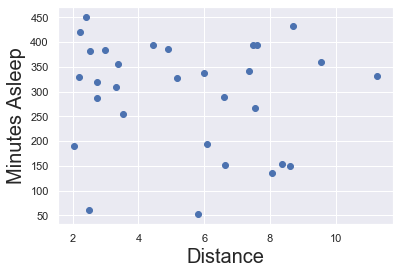

In [16]:
plt.scatter(x1,y)
plt.xlabel('Distance',fontsize=20)
plt.ylabel('Minutes Asleep',fontsize=20)
plt.show()

In [17]:
x1 = x1.values.reshape(-1,1)
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Minutes Asleep   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.3443
Date:                Fri, 31 Jul 2020   Prob (F-statistic):              0.562
Time:                        20:40:34   Log-Likelihood:                -182.96
No. Observations:                  30   AIC:                             369.9
Df Residuals:                      28   BIC:                             372.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        319.5279     47.267      6.760      0.000     222.707     416.349
x1            -4.6137      7.863     -0.587      0.562     -20.721      11.494
==============================================================================
Omnibus:                        3.288   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                2.916
Skew:                          -0.735   Prob(JB):                        0.233
Kurtosis:                       2.585   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

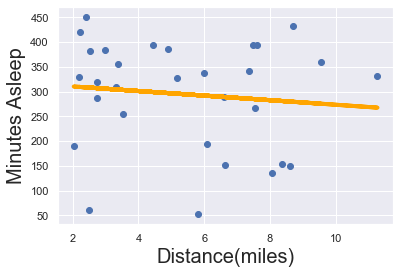

In [19]:
plt.scatter(x1,y)
yhat = x1*-4.6137+319.5279
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Distance(miles)', fontsize = 20)
plt.ylabel('Minutes Asleep', fontsize = 20)
plt.show()

In [21]:
#transform the inputs into a matrix (2D object)
#x_matrix = x1.values.reshape(-1,1)
#regression itself
reg = LinearRegression()
reg.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#r-squared
reg.score(x1,y)

0.012145459339586107

Prediction of Minutes Asleep when ran 7 miles

In [24]:
reg.predict([[7]])

array([287.23185565])